In [30]:
import numpy as np
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [31]:
day_1 = pd.read_csv('./round-4-island-data-bottle/prices_round_4_day_1.csv', sep=';')
day_2 = pd.read_csv('./round-4-island-data-bottle/prices_round_4_day_2.csv', sep=';')
day_3 = pd.read_csv('./round-4-island-data-bottle/prices_round_4_day_3.csv', sep=';')


In [32]:
merged_df = pd.concat([day_1, day_2, day_3], ignore_index=True)
day_1


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637,39,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637,33,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,999700,COCONUT_COUPON,681,46,NaN,NaN,NaN,NaN,682,46,NaN,NaN,NaN,NaN,681.5,0.0
19996,1,999800,COCONUT_COUPON,681,43,NaN,NaN,NaN,NaN,682,43,NaN,NaN,NaN,NaN,681.5,0.0
19997,1,999800,COCONUT,10134,122,10133.0,65.0,NaN,NaN,10136,181,NaN,NaN,NaN,NaN,10135.0,0.0
19998,1,999900,COCONUT_COUPON,682,36,NaN,NaN,NaN,NaN,683,36,NaN,NaN,NaN,NaN,682.5,0.0


In [33]:
# merged_df['average_bid_price'] = merged_df.apply(lambda row: (row['bid_price_1']*row['bid_volume_1'] + row['bid_price_2']*row['bid_volume_2'] + row['bid_price_3']*row['bid_volume_3']) / (row['bid_volume_1'] + row['bid_volume_2'] + row['bid_volume_3']), axis=1)
# merged_df['average_ask_price'] = merged_df.apply(lambda row: (row['ask_price_1']*row['bid_volume_1'] + row['ask_price_2']*row['bid_volume_2'] + row['ask_price_3']*row['bid_volume_3']) / (row['bid_volume_1'] + row['bid_volume_2'] + row['bid_volume_3']), axis=1)


In [49]:
coconut = merged_df.loc[merged_df['product'] == 'COCONUT'].reset_index(drop=True)['mid_price']
coconut_coupon = merged_df.loc[merged_df['product'] == 'COCONUT_COUPON'].reset_index(drop=True)['mid_price']



In [50]:
coconut_coupon

0        637.5
1        637.5
2        637.5
3        638.5
4        637.5
         ...  
29995    577.5
29996    577.5
29997    575.5
29998    575.5
29999    575.5
Name: mid_price, Length: 30000, dtype: float64

In [60]:
X = sm.add_constant(coconut_coupon)
model = sm.OLS(coconut, X)
results = model.fit()
hedge_ratio = results.params

In [61]:
hedge_ratio

const        8841.201393
mid_price       1.824590
dtype: float64

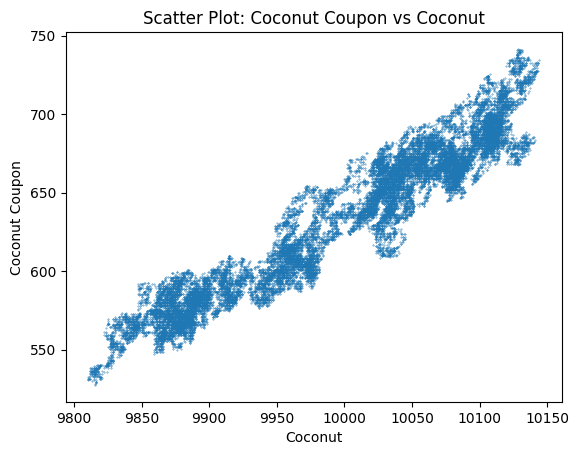

In [79]:
plt.scatter(coconut, coconut_coupon, s=0.1)
plt.xlabel('Coconut')
plt.ylabel('Coconut Coupon')
plt.title('Scatter Plot: Coconut Coupon vs Coconut')
plt.show()


In [62]:
spread = coconut - hedge_ratio[1] * coconut_coupon
result = adfuller(spread, autolag='AIC')


In [63]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[0] < result[4]["5%"]:
    print("Reject H0 - The series is likely stationary.")
else:
    print("Fail to reject H0 - The series is likely non-stationary.")

ADF Statistic: -6.165944
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject H0 - The series is likely stationary.


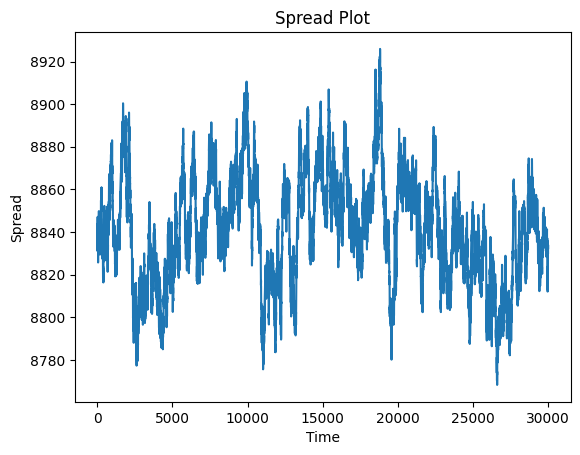

In [65]:
plt.plot(spread)
plt.xlabel('Time')
plt.ylabel('Spread')
plt.title('Spread Plot')
plt.show()


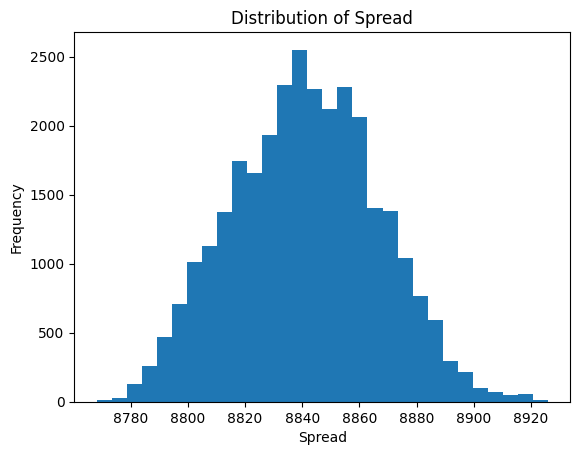

In [66]:
plt.hist(spread, bins=30)
plt.xlabel('Spread')
plt.ylabel('Frequency')
plt.title('Distribution of Spread')
plt.show()


In [74]:
spread_mean = spread.mean()
spread_median = spread.median()
spread_std = spread.std()
spread_kurtosis = spread.kurtosis()

spread_mean, spread_median, spread_std, spread_kurtosis


(8841.201392747003, 8841.167106384524, 25.49057616491594, -0.33482335272230657)

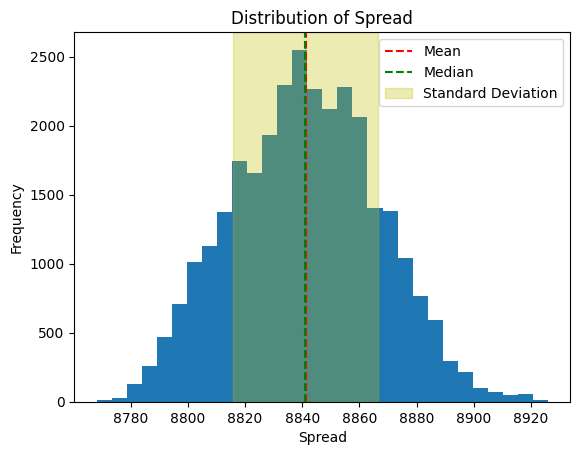

In [69]:
plt.hist(spread, bins=30)
plt.xlabel('Spread')
plt.ylabel('Frequency')
plt.title('Distribution of Spread')

# Add mean line
plt.axvline(spread_mean, color='r', linestyle='--', label='Mean')

# Add median line
plt.axvline(spread_median, color='g', linestyle='--', label='Median')

# Add standard deviation range
std_min = spread_mean - spread_std
std_max = spread_mean + spread_std
plt.axvspan(std_min, std_max, color='y', alpha=0.3, label='Standard Deviation')

plt.legend()
plt.show()


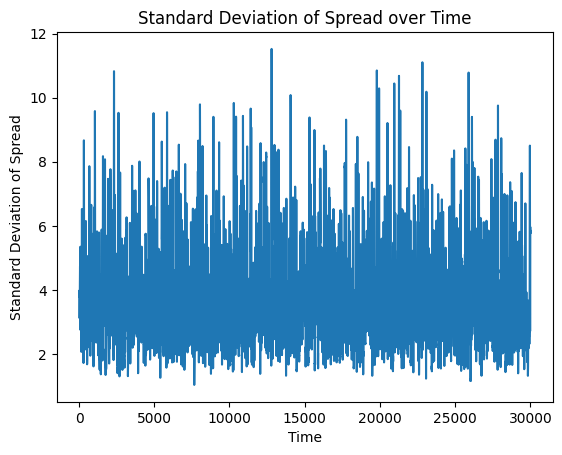

In [70]:
spread_std_rolling = spread.rolling(window=30).std()

plt.plot(spread_std_rolling)
plt.xlabel('Time')
plt.ylabel('Standard Deviation of Spread')
plt.title('Standard Deviation of Spread over Time')
plt.show()
